In [1]:
import pandas as pd
from hanziconv import HanziConv 
import unicodedata
import jieba
from stopwordsiso import stopwords
import emoji
from snownlp import SnowNLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

'''
1. Tranditional Chinese to Simplfied Chinese
2. *Count the original chinese letter 
3. Tokenization
4. Removal of stopwords and punctuation
5. Removal of Emoji *Count number of emoji used
6. *Count the review length : count Chinese words(after tokenization and removal of stopwords), count English words and number (no change)
7. *Sentiment score of Chinese token
8. Split into X_train, X_test, y_train, y_test
9. *Calculate TFIDF: tfidf.fit_transform(train_X["text"]) tfidf.transform(test_X["text"])
10. Fit into SVC

'''

ModuleNotFoundError: No module named 'jieba'

In [3]:
df = pd.read_csv("./doubanRawData/finalized_reviews.csv", delimiter= ',')
X = df[["short_comment","score", "movie_name"]].copy()
Y = df[["Fake"]].copy()
X.head()

,short_comment,score,movie_name
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静
1,能给负分吗卧槽 浪费我时间,1,独行月球
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3


In [4]:
Y

,Fake
0,1
1,1
2,1
3,1
4,1
...,...
1595,0
1596,0
1597,0
1598,0


In [5]:
X['short_comment'] = X['short_comment'].apply(HanziConv.toSimplified)
X


,short_comment,score,movie_name
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静
1,能给负分吗卧槽 浪费我时间,1,独行月球
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3
...,...,...,...
1595,披着推理外衣的合家欢喜剧片。最后的强行煽情让人似曾相识，名侦探柯南都是这么结尾的。,3,唐人街探案3
1596,至少比暗恋强点,3,一周的朋友
1597,感觉还差点意思，看出四字努力了，但那装酷时用力的嘴再稍稍放松点就好了，这样表情会自然些。女生...,2,送你一朵小红花
1598,有点好笑，又觉得没啥好看的。,3,这个杀手不太冷静


In [6]:
X["mention_of_movie_name"] = 0
for i in range(len(X)):
    X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))
X

/var/folders/61/k0_q7qq9317ftc72ftt9bh1r0000gn/T/ipykernel_28034/2297005332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))


,short_comment,score,movie_name,mention_of_movie_name
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静,0
1,能给负分吗卧槽 浪费我时间,1,独行月球,0
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静,0
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3,0
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3,0
...,...,...,...,...
1595,披着推理外衣的合家欢喜剧片。最后的强行煽情让人似曾相识，名侦探柯南都是这么结尾的。,3,唐人街探案3,0
1596,至少比暗恋强点,3,一周的朋友,0
1597,感觉还差点意思，看出四字努力了，但那装酷时用力的嘴再稍稍放松点就好了，这样表情会自然些。女生...,2,送你一朵小红花,0
1598,有点好笑，又觉得没啥好看的。,3,这个杀手不太冷静,0


In [7]:
if "独行月球" in "太痛苦了 独行月球 大过年一大早让我如坐针毡":
    print("Yes")
print("太痛苦了月球  大过年一大早让我如坐针毡".count("独行月球"))

Yes
0


In [8]:
X['ori_chinese_count'] = 0

def word_count(words):
  wordcount = 0
  wordcount_CN = 0
  wordcount_EN = 0
  wordcount_N = 0
  start = True
  for word in words:
    cat = unicodedata.category(word)
    if cat == 'Lo':        # Chinese Letter
      wordcount += 1       # each letter counted as a word
      wordcount_CN += 1
      start = True                       
    elif cat[0] == 'P':    # Some kind of punctuation
      # wordcount += 1     
      start = True                       
    elif cat[0] == 'Z':    # Some kind of separator
      start = True
    else:                  # Everything else
      if start:            
        wordcount += 1     # Only count at the start
        if cat[0]== 'N':
            wordcount_N += 1
        else:
            wordcount_EN += 1
      start = False
  return (wordcount_CN, wordcount_EN, wordcount_N, wordcount) 

for i in range(len(X)):
  X.at[i, "ori_chinese_count"] = word_count(X["short_comment"].iloc[i])[0]

X

,short_comment,score,movie_name,mention_of_movie_name,ori_chinese_count
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静,0,17
1,能给负分吗卧槽 浪费我时间,1,独行月球,0,12
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静,0,16
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3,0,21
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3,0,77
...,...,...,...,...,...
1595,披着推理外衣的合家欢喜剧片。最后的强行煽情让人似曾相识，名侦探柯南都是这么结尾的。,3,唐人街探案3,0,38
1596,至少比暗恋强点,3,一周的朋友,0,7
1597,感觉还差点意思，看出四字努力了，但那装酷时用力的嘴再稍稍放松点就好了，这样表情会自然些。女生...,2,送你一朵小红花,0,61
1598,有点好笑，又觉得没啥好看的。,3,这个杀手不太冷静,0,12


In [9]:
def tokenize(word):
    return list(jieba.cut(word))

X['text'] = X['short_comment'].apply(tokenize)
X = X.drop("short_comment", axis=1)
X = X[list(("text", "score", "ori_chinese_count"))]
X


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/61/k0_q7qq9317ftc72ftt9bh1r0000gn/T/jieba.cache
Loading model cost 0.773 seconds.
Prefix dict has been built successfully.


,text,score,ori_chinese_count
0,"[没想到, ，, 这是, 唯一, 一部, 尊重, 春节, 档, 的, 电影, 。]",4,17
1,"[能, 给, 负分, 吗, 卧槽, , 浪费, 我, 时间]",1,12
2,"[太, 痛苦, 了, , 大过年, 一大早, 让, 我, 如坐针毡]",1,16
3,"[要不是, 电影院, 没, 开, 空调, 一直, 冻, 我, , 我能, 直接, 睡过去]",2,21
4,"[低俗, 谄媚, 粗制滥造, ，, 连, 起码, 的, 诚意, 都, 没有, ，, 推理, ...",2,77
...,...,...,...
1595,"[披, 着, 推理, 外衣, 的, 合家欢, 喜剧片, 。, 最后, 的, 强行, 煽情, ...",3,38
1596,"[至少, 比, 暗恋, 强, 点]",3,7
1597,"[感觉, 还, 差点, 意思, ，, 看出, 四字, 努力, 了, ，, 但, 那, 装酷,...",2,61
1598,"[有点, 好笑, ，, 又, 觉得, 没, 啥, 好看, 的, 。]",3,12


In [10]:
stopwords_list = list(stopwords(["zh"]))
punc_list = '[\.\!︕\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）：；《）《》“”()»〔〕-]+-_-Ｄ '
def removal_sw(text_tokens):

    return [word for word in text_tokens if not word in list(stopwords(["zh"])) and not word in punc_list]

X['text'] = X['text'].apply(removal_sw)
X



,text,score,ori_chinese_count
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,17
1,"[负分, 卧槽, 浪费, 时间]",1,12
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,16
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,21
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,77
...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,38
1596,"[至少, 暗恋, 强]",3,7
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,61
1598,"[有点, 好笑, 觉得, 没, 好看]",3,12


In [11]:

X["Emoji"] = 0
X

,text,score,ori_chinese_count,Emoji
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,17,0
1,"[负分, 卧槽, 浪费, 时间]",1,12,0
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,16,0
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,21,0
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,77,0
...,...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,38,0
1596,"[至少, 暗恋, 强]",3,7,0
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,61,0
1598,"[有点, 好笑, 觉得, 没, 好看]",3,12,0


In [12]:
# [word for word in text_tokens if not word in list(stopwords(["zh"])) and not emoji.is_emoji(word)] 
X = X.copy()

def contain_emoji(text):
    global emoji_no
    is_contain = False
    for word in text:
        if emoji.is_emoji(word):
            emoji_no += 1
            is_contain = True
    return is_contain

for i in range(len(X)):
    emoji_no = 0
    if contain_emoji(X["text"].iloc[i]):
        X["text"].iloc[i] = [word for word in X["text"].iloc[i] if not emoji.is_emoji(word)] 
    X.at[i, "Emoji"] = emoji_no

X

/var/folders/61/k0_q7qq9317ftc72ftt9bh1r0000gn/T/ipykernel_28034/531768005.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"].iloc[i] = [word for word in X["text"].iloc[i] if not emoji.is_emoji(word)]


,text,score,ori_chinese_count,Emoji
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,17,0
1,"[负分, 卧槽, 浪费, 时间]",1,12,0
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,16,0
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,21,0
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,77,0
...,...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,38,0
1596,"[至少, 暗恋, 强]",3,7,0
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,61,0
1598,"[有点, 好笑, 觉得, 没, 好看]",3,12,0


In [13]:
X["chinese_count"] = 0
X["english_count"] = 0
X["number_count"] = 0

for i in range(len(X)):
  wordcount_list = [0, 0, 0, 0]
  for words in X["text"].iloc[i]:
    wordcount_list = [a + b for a, b in zip(wordcount_list, word_count(words))]
  X.at[i, "chinese_count"] = wordcount_list[0]
  X.at[i, "english_count"] = wordcount_list[1]
  X.at[i, "number_count"] = wordcount_list[2]

X

,text,score,ori_chinese_count,Emoji,chinese_count,english_count,number_count
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,17,0,16,0,0
1,"[负分, 卧槽, 浪费, 时间]",1,12,0,8,0,0
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,16,0,13,0,0
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,21,0,17,0,0
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,77,0,62,0,1
...,...,...,...,...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,38,0,28,0,0
1596,"[至少, 暗恋, 强]",3,7,0,5,0,0
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,61,0,40,0,0
1598,"[有点, 好笑, 觉得, 没, 好看]",3,12,0,9,0,0


In [14]:
X["Sentiment"] = 0
X

,text,score,ori_chinese_count,Emoji,chinese_count,english_count,number_count,Sentiment
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,17,0,16,0,0,0
1,"[负分, 卧槽, 浪费, 时间]",1,12,0,8,0,0,0
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,16,0,13,0,0,0
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,21,0,17,0,0,0
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,77,0,62,0,1,0
...,...,...,...,...,...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,38,0,28,0,0,0
1596,"[至少, 暗恋, 强]",3,7,0,5,0,0,0
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,61,0,40,0,0,0
1598,"[有点, 好笑, 觉得, 没, 好看]",3,12,0,9,0,0,0


In [15]:

for i in range(len(X)):
    sentiment_sum = 0
    count = 0
    # if it is Chinese token:
    for word in X["text"].iloc[i]:
        cat = unicodedata.category(word[0])
        if not (cat == 'Ll' or cat == 'Lu'):
            sentiment_sum += SnowNLP(word).sentiments
            count += 1
    if count == 0:
        X.at[i, "Sentiment"] = 0.5 # neutral 
    else:
        X.at[i, "Sentiment"] = sentiment_sum/count


In [16]:
''' 
# This is not work with SNOWNLP because this tool tends to give score > 0.5 (positive)
for i in range(len(X)):
    sentiment_sum = 0
    positive_sum = 0
    negative_sum = 0
    # if it is Chinese token:
    for word in X["text"].iloc[i]:
        cat = unicodedata.category(word[0])
        if not (cat == 'Ll' or cat == 'Lu'):
            sentiment = SnowNLP(word).sentiments
            sentiment_sum += 1
            if sentiment>=0.5:
                positive_sum += 1
            else:
                negative_sum += 1
    if sentiment_sum == 0:
        X.at[i, "Sentiment"] = 0.5 # neutral 
    else:
        X.at[i, "Sentiment"] = (positive_sum + negative_sum) / sentiment_sum
'''

' \n# This is not work with SNOWNLP because this tool tends to give score > 0.5 (positive)\nfor i in range(len(X)):\n    sentiment_sum = 0\n    positive_sum = 0\n    negative_sum = 0\n    # if it is Chinese token:\n    for word in X["text"].iloc[i]:\n        cat = unicodedata.category(word[0])\n        if not (cat == \'Ll\' or cat == \'Lu\'):\n            sentiment = SnowNLP(word).sentiments\n            sentiment_sum += 1\n            if sentiment>=0.5:\n                positive_sum += 1\n            else:\n                negative_sum += 1\n    if sentiment_sum == 0:\n        X.at[i, "Sentiment"] = 0.5 # neutral \n    else:\n        X.at[i, "Sentiment"] = (positive_sum + negative_sum) / sentiment_sum\n'

In [17]:
X

,text,score,ori_chinese_count,Emoji,chinese_count,english_count,number_count,Sentiment
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,17,0,16,0,0,0.571120
1,"[负分, 卧槽, 浪费, 时间]",1,12,0,8,0,0,0.335371
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,16,0,13,0,0,0.439382
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,21,0,17,0,0,0.389829
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,77,0,62,0,1,0.521645
...,...,...,...,...,...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,38,0,28,0,0,0.670782
1596,"[至少, 暗恋, 强]",3,7,0,5,0,0,0.636980
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,61,0,40,0,0,0.615506
1598,"[有点, 好笑, 觉得, 没, 好看]",3,12,0,9,0,0,0.481583


<AxesSubplot: ylabel='Sentiment'>

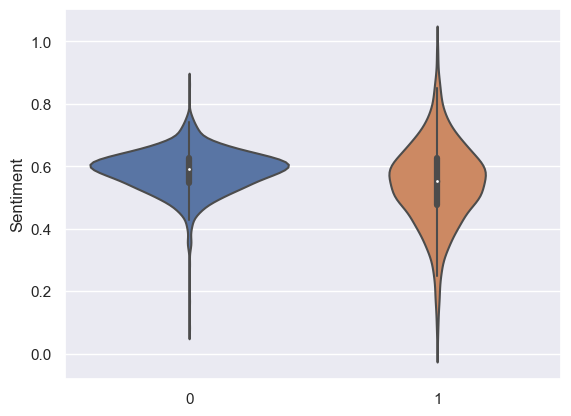

In [18]:
sns.set(style="darkgrid")
sns.violinplot(y=X["Sentiment"], x=list(Y["Fake"]))


<AxesSubplot: ylabel='score'>

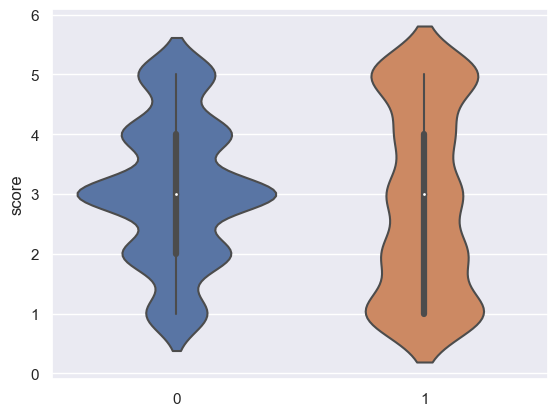

In [19]:
sns.violinplot(y=X["score"], x=list(Y["Fake"]))

<AxesSubplot: ylabel='number_count'>

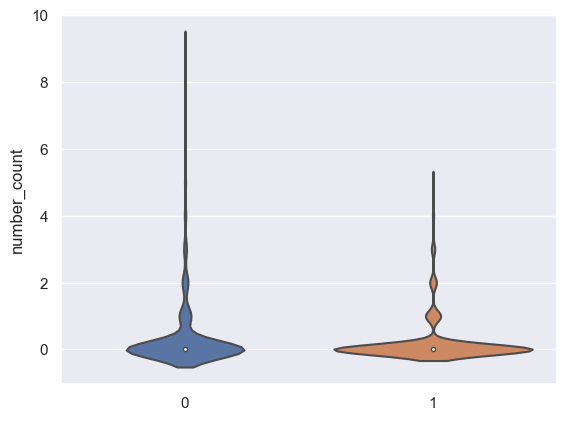

In [20]:
sns.violinplot(y=X["number_count"], x=list(Y["Fake"]))

<AxesSubplot: ylabel='english_count'>

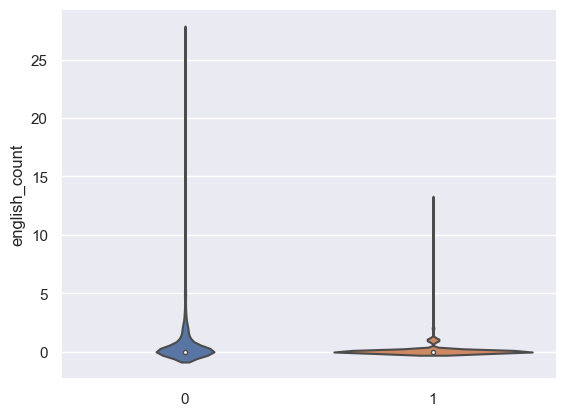

In [21]:
sns.violinplot(y=X["english_count"], x=list(Y["Fake"]))

<AxesSubplot: ylabel='chinese_count'>

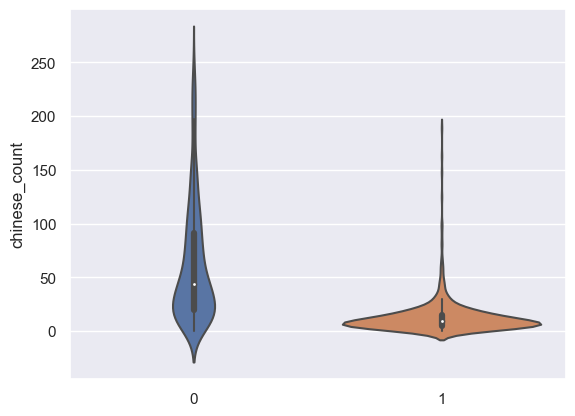

In [22]:
sns.violinplot(y=X["chinese_count"], x=list(Y["Fake"]))

<AxesSubplot: ylabel='ori_chinese_count'>

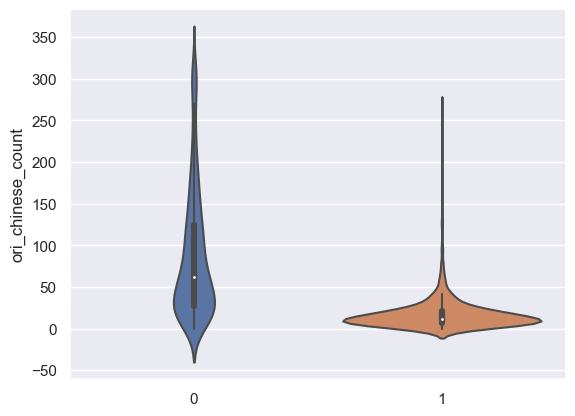

In [23]:
sns.violinplot(y=X["ori_chinese_count"], x=list(Y["Fake"]))

<AxesSubplot: ylabel='Emoji'>

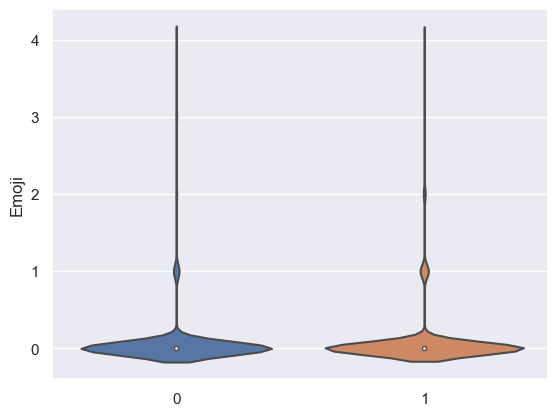

In [24]:
sns.violinplot(y=X["Emoji"], x=list(Y["Fake"]))

In [25]:
X = X.drop("Emoji", axis=1)
X = X.drop("ori_chinese_count", axis=1)

In [26]:
X

,text,score,chinese_count,english_count,number_count,Sentiment
0,"[没想到, 这是, 唯一, 一部, 尊重, 春节, 档, 电影]",4,16,0,0,0.571120
1,"[负分, 卧槽, 浪费, 时间]",1,8,0,0,0.335371
2,"[太, 痛苦, 大过年, 一大早, 如坐针毡]",1,13,0,0,0.439382
3,"[电影院, 没, 开, 空调, 一直, 冻, 我能, 直接, 睡过去]",2,17,0,0,0.389829
4,"[低俗, 谄媚, 粗制滥造, 起码, 诚意, 没有, 推理, 全靠, 奇情, 轶闻, 笑点,...",2,62,0,1,0.521645
...,...,...,...,...,...,...
1595,"[披, 推理, 外衣, 合家欢, 喜剧片, 最后, 强行, 煽情, 似曾相识, 名, 侦探,...",3,28,0,0,0.670782
1596,"[至少, 暗恋, 强]",3,5,0,0,0.636980
1597,"[感觉, 差点, 意思, 看出, 四字, 努力, 装酷, 用力, 嘴, 稍稍, 放松, 表情...",2,40,0,0,0.615506
1598,"[有点, 好笑, 觉得, 没, 好看]",3,9,0,0,0.481583


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)
X_train

,text,score,chinese_count,english_count,number_count,Sentiment
566,"[懂, 浪漫, 过敏, 好看]",5,7,0,0,0.559914
1001,"[原作, 油腻, 很多, 前, 一半, 后面, 看不下去, 主要, 开心, 麻花, 表演, ...",2,67,0,0,0.580910
224,"[内核, 比较, 老套, 鸡汤, 说教, 味, 太, 浓]",3,13,0,0,0.407266
496,"[十岁, 观影, 适龄]",2,6,0,0,0.672101
722,"[好笑, 相比, 银幕, 刘昊然, 易, 烊, 千玺, 觉得, 魏翔, 值得]",4,19,0,0,0.586223
...,...,...,...,...,...,...
406,"[实在, 太, 难看, 推荐, 看看, 朋友, 新导, 大片, 刺客]",1,17,0,0,0.419282
1414,"[人群, 似乎, 总带, 滤镜, 美剧, 国产, 剧, 标签, 一贴, 似乎, 已经, 注定...",5,93,0,0,0.671567
143,"[口红, 太红]",3,4,0,0,0.437663
1265,"[密室, 太弱, 看过, 100, 集柯南, 够用, 八点档, 剧情, 忒, 烦人, csc...",3,61,5,3,0.545885


In [28]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [29]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None, use_idf=True) 


In [30]:
temp_text = list(X_train["text"])
temp_X = tfidf.fit_transform(temp_text)
mydf = pd.DataFrame(temp_X.toarray(), columns=tfidf.get_feature_names())

X_train_tfidf = pd.concat([X_train, mydf], axis=1)
X_train_tfidf = X_train_tfidf.drop("text", axis=1)
print(X_train_tfidf)
X_train_tfidf.to_csv("X_train_tfidf.csv", index=False)


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


      score  chinese_count  english_count  number_count  Sentiment   \t  \r\n  \
0         5              7              0             0   0.559914  0.0   0.0   
1         2             67              0             0   0.580910  0.0   0.0   
2         3             13              0             0   0.407266  0.0   0.0   
3         2              6              0             0   0.672101  0.0   0.0   
4         4             19              0             0   0.586223  0.0   0.0   
...     ...            ...            ...           ...        ...  ...   ...   
1275      1             17              0             0   0.419282  0.0   0.0   
1276      5             93              0             0   0.671567  0.0   0.0   
1277      3              4              0             0   0.437663  0.0   0.0   
1278      3             61              5             3   0.545885  0.0   0.0   
1279      1              6              0             0   0.465479  0.0   0.0   

       ..  ...  ....  ...  

In [31]:
temp_text = list(X_test["text"])
temp_X = tfidf.transform(temp_text)
mydf = pd.DataFrame(temp_X.toarray(), columns=tfidf.get_feature_names())

X_test_tfidf = pd.concat([X_test, mydf], axis=1)
X_test_tfidf = X_test_tfidf.drop("text", axis=1)
print(X_test_tfidf)
X_test_tfidf.to_csv("X_test_tfidf.csv", index=False)


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     score  chinese_count  english_count  number_count  Sentiment   \t  \r\n  \
0        4             37              0             0   0.542847  0.0   0.0   
1        5             13              0             0   0.549839  0.0   0.0   
2        5            104              1             6   0.609195  0.0   0.0   
3        3              5              0             0   0.612009  0.0   0.0   
4        4             19              0             0   0.559647  0.0   0.0   
..     ...            ...            ...           ...        ...  ...   ...   
315      3             74              0             0   0.632646  0.0   0.0   
316      1              8              0             0   0.675705  0.0   0.0   
317      2              2              0             0   0.126984  0.0   0.0   
318      4             24              0             0   0.593561  0.0   0.0   
319      3              4              0             0   0.329456  0.0   0.0   

      ..  ...  ....  ...   鼻酸   鼾声    齁

In [32]:
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)